In [1]:
import torch
from torchvision import transforms

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from models import UNet
from train import test
from utils.utils import evaluate

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_channels = 3
out_channels = 3
img_size = 400

model = UNet(in_channels, out_channels).to(device)

transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

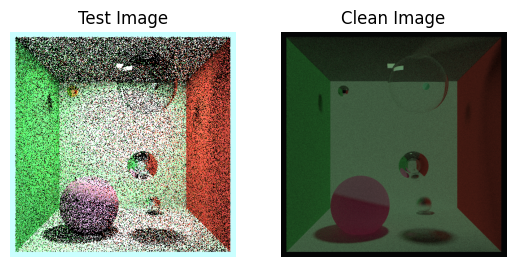

In [3]:
import random
# test_image = '../test_data/test_image3.jpg'
image_index = random.randint(1, 2000)

test_image = f'data/generated_images/noisy/generated_image_{image_index}.jpg'
clean_image = f'data/generated_images/clean/generated_image_{image_index}.jpg'

img = mpimg.imread(test_image)
clean_img = mpimg.imread(clean_image)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')

plt.subplot(1, 2, 2)
plt.imshow(clean_img)
plt.axis('off')
plt.title('Clean Image')

plt.show()

In [4]:
test_image = '../test_data/test_image_random.jpg'

loaded model for testing
De-noised image shape: torch.Size([1, 3, 400, 400])


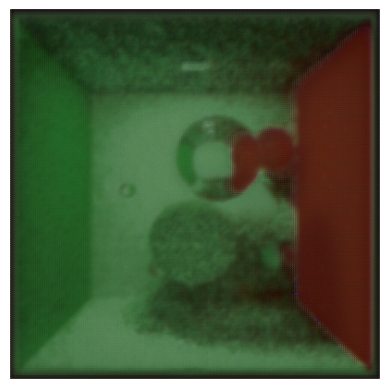

In [5]:
test(device, network=model, transform=transform, load_prev=True, save_img=False, image_path=test_image)

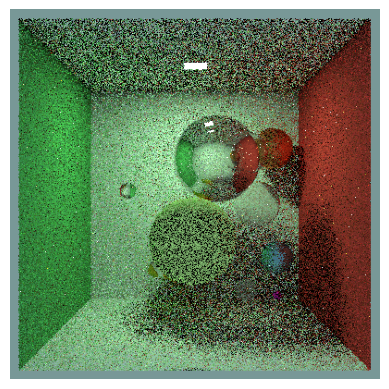

In [16]:
test_image = f'../test_data/test_image_random.jpg'
img = mpimg.imread(test_image)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
from torch.utils.data import DataLoader
from datasets import DenoiserDataset

clean_dir = 'data/val_images/clean'
noisy_dir = 'data/val_images/noisy'
dataset = DenoiserDataset(clean_dir, noisy_dir, transform=transform)
dataloader = DataLoader(dataset, shuffle=True, batch_size=8)

In [6]:
criterion = torch.nn.SmoothL1Loss()
evaluate(device, model, transform, dataloader=dataloader, criterion=criterion)

Average Loss: 0.1015
Average MSE: 0.1015
Average PSNR: 9.9344
